In [1]:
import tensorflow as tf
import numpy as np

import os
from PIL import Image

/mnt/lfs2/pric7208/miniconda3/envs/tensorflow/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
n = 512

def parser(record):
    keys_to_features = {
        "original":  tf.FixedLenFeature([], tf.string),
        "segmented": tf.FixedLenFeature([], tf.string)
    }
    parsed = tf.parse_single_example(record, keys_to_features)
    original = tf.decode_raw(parsed["original"], tf.uint8)
    original = tf.cast(original, tf.float32)
    original = tf.reshape(original, shape=[n, n, 3])
    
    segmented = tf.decode_raw(parsed["segmented"], tf.uint8)
    segmented = tf.cast(segmented, tf.float32)
    segmented = tf.reshape(segmented, shape=[n, n])

    return original, segmented

In [3]:
def input_fn(filenames, train, batch_size=50, buffer_size=2048):
    dataset = tf.data.TFRecordDataset(filenames=filenames)
    dataset = dataset.map(parser)

    if train:
        dataset = dataset.shuffle(buffer_size=buffer_size)
        num_repeat = None
    else:
        num_repeat = 1

    dataset = dataset.repeat(num_repeat)
    dataset = dataset.batch(batch_size)
    iterator = dataset.make_one_shot_iterator()
    #x, y = iterator.get_next()
    #return x, y
    return iterator

In [4]:
sess = tf.InteractiveSession()
ds_iterator = input_fn('val_512.tfrecords', train=False)
x_, y_ = ds_iterator.get_next()
x_, y_ = sess.run([x_, y_])

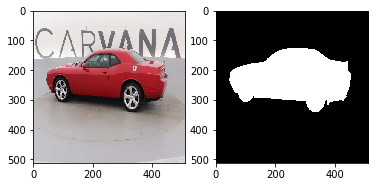

In [5]:
import matplotlib.pyplot as plt
% matplotlib inline

image0 = Image.fromarray(x_[0].astype(np.uint8), 'RGB')
mask0 = Image.fromarray(y_[0] * 255)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(image0)
ax2.imshow(mask0);